# Validation Results Camara Compton Simulation

__Author: Antonio Gómez Carrera__

## Theory - Scattering Compton 

<img src="https://cdn.britannica.com/06/62906-050-DFDEC5DD/X-ray-photon-part-electron-energy-AH-Compton.jpg" width="300">

[Compton effect](https://www.britannica.com/science/Compton-effect)

$$
\cos\theta = 1-m_0 c^2 (\frac{1}{E_f}-\frac{1}{E_i})
$$

Cross Section is described by the Klein-Nishina Formula

<img src="Pictures/Compton_Angle" width = "300">

[Researchgate-Developement of new educational apparatus to visualize scattered X-rays](https://www.researchgate.net/publication/274899763_Development_of_new_educational_apparatus_to_visualize_scattered_X-rays?_tp=eyJjb250ZXh0Ijp7ImZpcnN0UGFnZSI6Il9kaXJlY3QiLCJwYWdlIjoiX2RpcmVjdCJ9fQ)



## Compton Camera

<img src="https://www.researchgate.net/profile/Chan-Hyeong-Kim/publication/224353796/figure/fig1/AS:671511329390603@1537112185611/Principle-of-a-Compton-camera-The-Compton-scattering-angle-is-the-opening-angle-of-the.ppm" width="300">

[Researhgate-A Novel Method for Imptoving the Imaging Resolution of a Table-Top Compton Camera](https://www.researchgate.net/publication/224353796_AID_-_A_Novel_Method_for_Improving_the_Imaging_Resolution_of_a_Table-Top_Compton_Camera?_tp=eyJjb250ZXh0Ijp7ImZpcnN0UGFnZSI6Il9kaXJlY3QiLCJwYWdlIjoiX2RpcmVjdCJ9fQ)

$$
\cos\theta = 1- \frac{m_0 c^2 E_1}{E_2(E_1+E_2)}
$$

The $E_1$ corresponds with the energy deposition in the Scatterer detector

The $E_2$ is the energy deposition in the Absorber detector

In [1]:
import ROOT

Welcome to JupyROOT 6.30/02


In [2]:
file = ROOT.TFile('validation6.root')
galactic = ROOT.TFile('validation_galactic.root')

Parameters used:

```
    _world_width = 682*mm;
    _world_height = 562*mm;
    _world_depth = 354*mm;

    _detector_size = 300*mm;
    _detector_thickness = 150*um;
    _detector_number = 2;
    
    _detector_distance[1] = 100*mm;
    _detector_distance[2] = 200*mm;
    
    Particle_Energy = 70keV

```

Beam of 5000000 particles

Physic lists:
* EmStandarPhysics_option4
* DecayPhysics


### Events

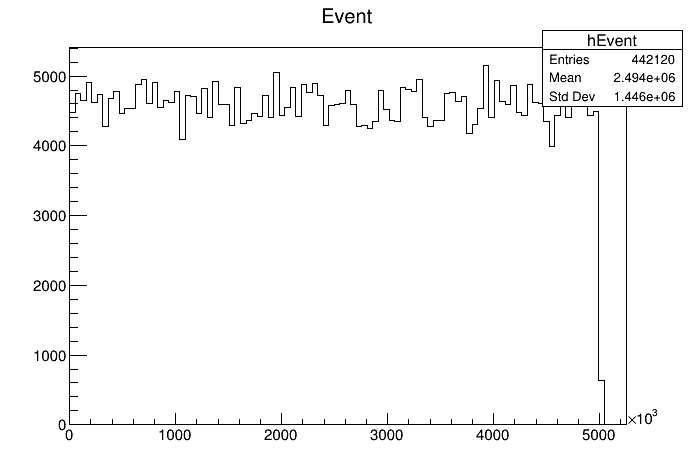

In [3]:
c = ROOT.TCanvas()
hEvent = file.Hits.Draw("Event>>hEvent()","","")
c.Draw()


### Particle ID

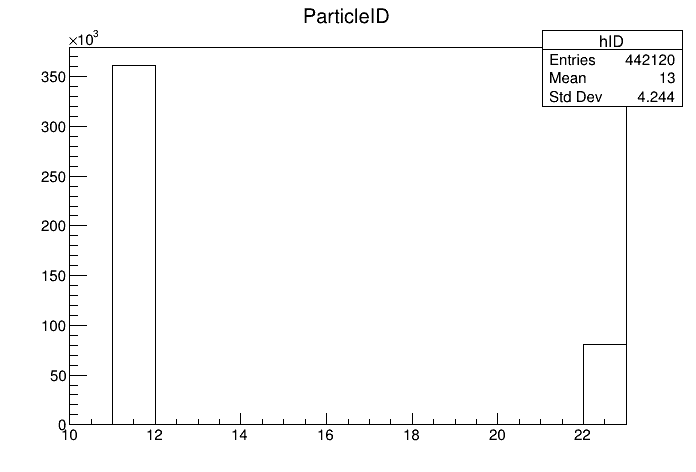

In [4]:
c1 = ROOT.TCanvas()
#hPartID = file.Hits.Draw("ParticleID>>hID(14,9.5,23.5)","","")
file.Hits.Draw("ParticleID>>hID","","")
c1.Draw()

11-> e-

22 -> Photons

### Detector ID

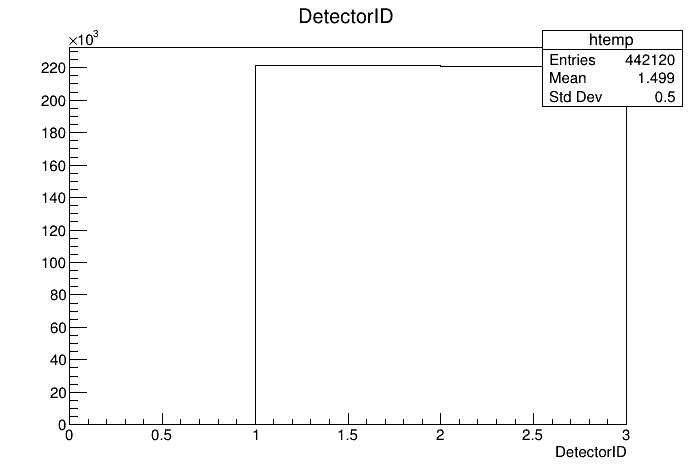

In [5]:
c2 = ROOT.TCanvas()
file.Hits.Draw("DetectorID","","")

c2.Draw()

### Process name

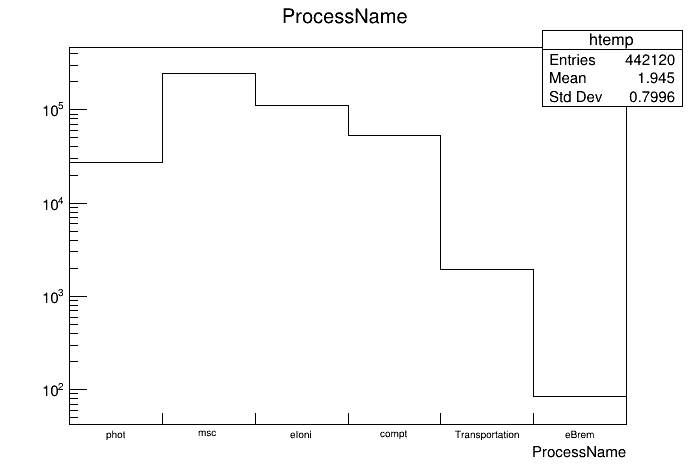

In [6]:
c2 = ROOT.TCanvas()
c2.SetLogy()
file.Hits.Draw("ProcessName","","")
c2.Draw()

In [7]:
c2a = ROOT.TCanvas()
c2a.Divide(2,1)
c2a.cd(1)
c2a.cd(1).SetLogy()

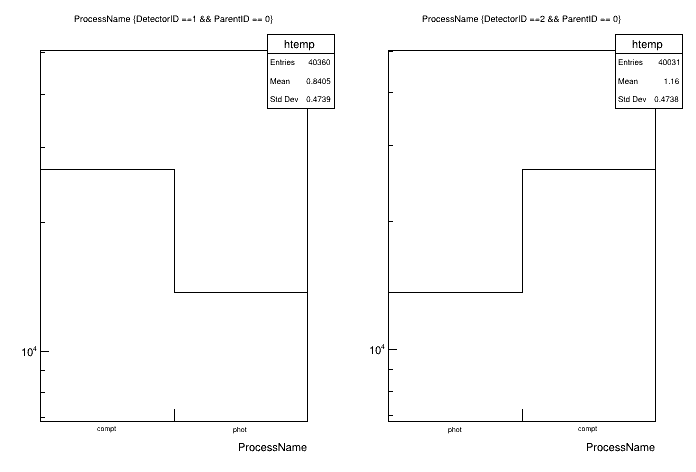

In [8]:
file.Hits.Draw("ProcessName","DetectorID ==1 && ParentID == 0","")
c2a.cd(2)
c2a.cd(2).SetLogy()
file.Hits.Draw("ProcessName","DetectorID ==2 && ParentID == 0","")
c2a.Draw()

### Position

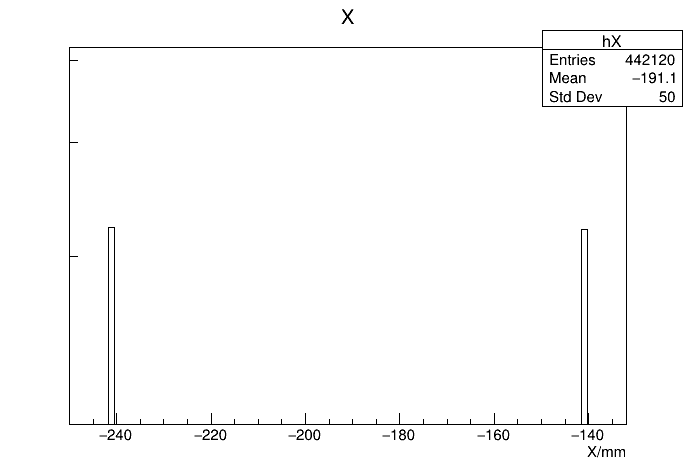

In [9]:
c3 = ROOT.TCanvas()
c3.SetLogy()
file.Hits.Draw("X>>hX()", "", "HIST")
hX = ROOT.gDirectory.Get("hX")
hX.GetXaxis().SetTitle('X/mm')
c3.Draw()

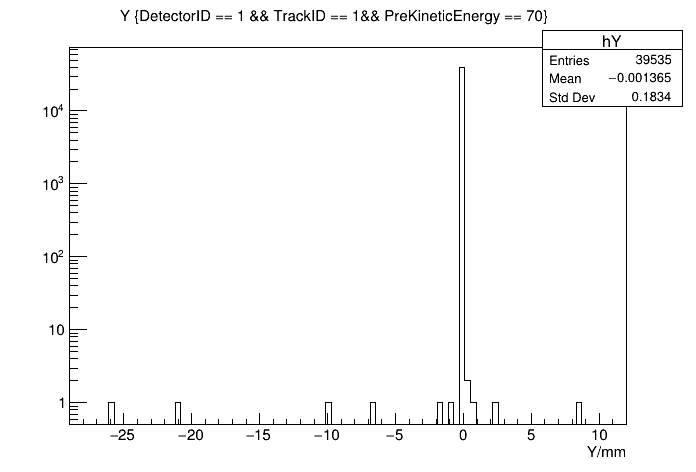

In [10]:
c4 = ROOT.TCanvas()
c4.SetLogy()
file.Hits.Draw("Y>>hY", "DetectorID == 1 && TrackID == 1"\
               "&& PreKineticEnergy == 70","")
hY = ROOT.gDirectory.Get("hY")
hY.GetXaxis().SetTitle('Y/mm')
c4.Draw()

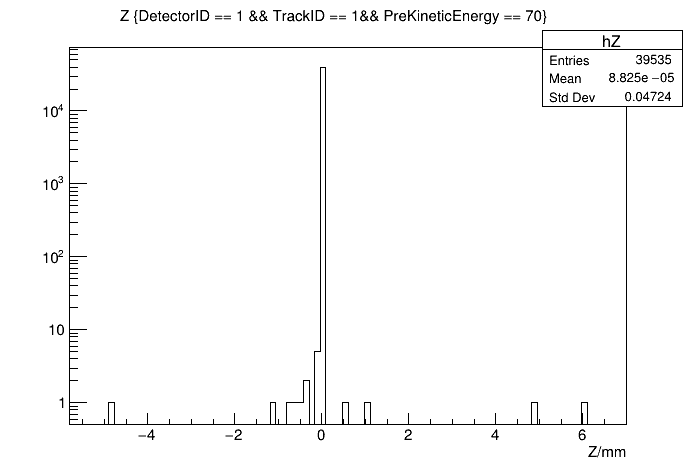

In [11]:
c5 = ROOT.TCanvas()
c5.SetLogy()
file.Hits.Draw("Z>>hZ", "DetectorID == 1 && TrackID == 1"\
               "&& PreKineticEnergy == 70","")
hZ = ROOT.gDirectory.Get("hZ")
hZ.GetXaxis().SetTitle('Z/mm')
c5.Draw()


Hits in the first detector of the incidente particles should be at Y=0, Z=0 but it is seen a dispersion, why?


Can the dispersion correspond with second interactions in te first detector?

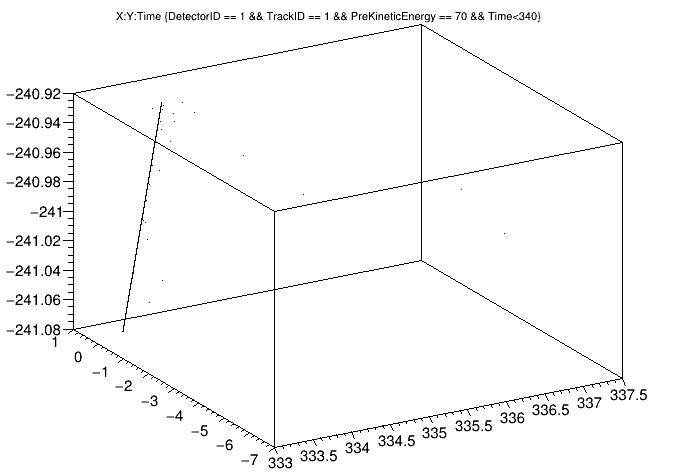

In [12]:
c4a = ROOT.TCanvas()
file.Hits.Draw("X:Y:Time>>yT","DetectorID == 1 && TrackID == 1 "\
               "&& PreKineticEnergy == 70 && Time<340", "")
yT = ROOT.gDirectory.Get("yT")
yT.GetXaxis().SetTitle('t/ps')
yT.GetYaxis().SetTitle('Y/mm')
c4a.Draw()

Check the results in the simulation with galactic medium to check if the dispersion is caused by the air between source and detector

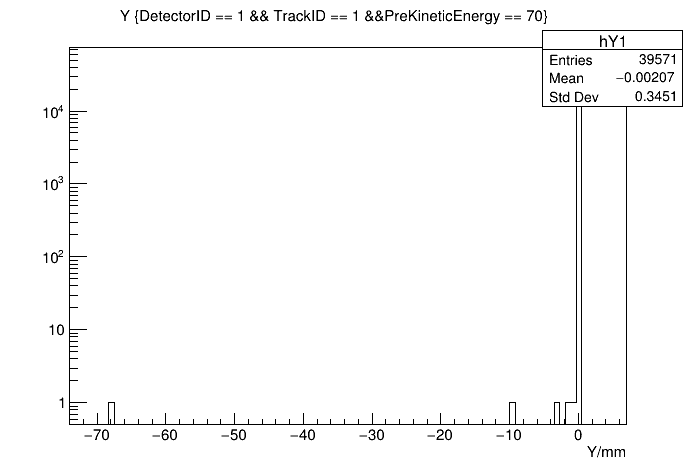

In [13]:
c4b = ROOT.TCanvas()
c4b.SetLogy()
galactic.Hits.Draw("Y>>hY1", "DetectorID == 1 && TrackID == 1 &&"\
                    "PreKineticEnergy == 70","")
hY1 = ROOT.gDirectory.Get("hY1")
hY1.GetXaxis().SetTitle('Y/mm')
c4b.Draw()

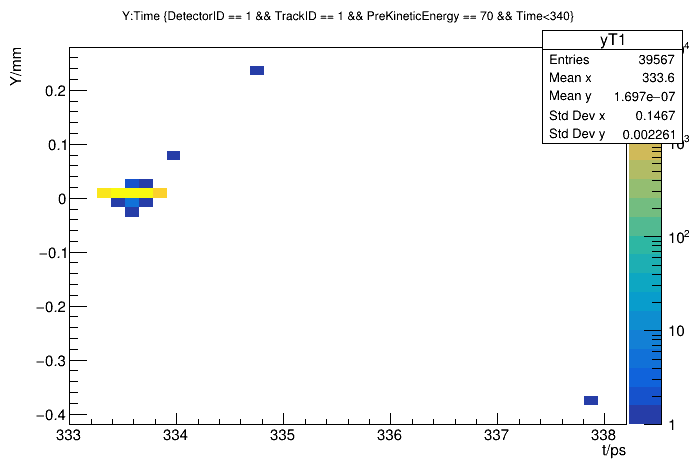

In [14]:
c4c = ROOT.TCanvas()
c4c.SetLogz()
galactic.Hits.Draw("Y:Time>>yT1","DetectorID == 1 && TrackID == 1 "\
               "&& PreKineticEnergy == 70 && Time<340", "Colz")
yT1 = ROOT.gDirectory.Get("yT1")
yT1.GetXaxis().SetTitle('t/ps')
yT1.GetYaxis().SetTitle('Y/mm')
c4c.Draw()

Also observed dispersion with galactic, however this dispersion is smaller and can explain partially this disperssion

### Pre-Momentum

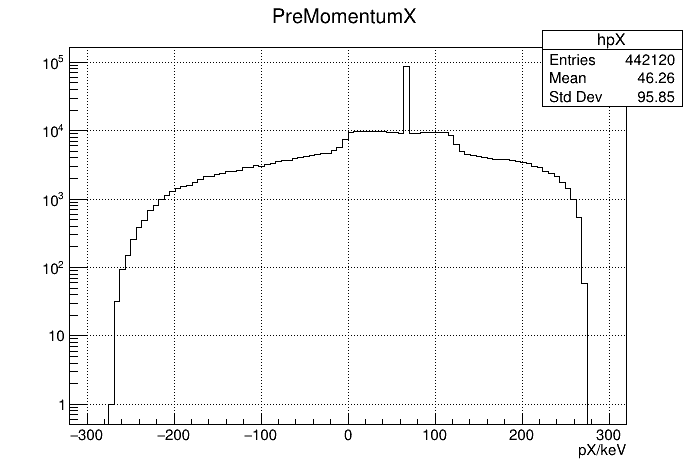

In [15]:
c6 = ROOT.TCanvas()
c6.SetLogy()
c6.SetGrid()
file.Hits.Draw("PreMomentumX>>hpX", "","")
hpX = ROOT.gDirectory.Get("hpX")
hpX.GetXaxis().SetTitle('pX/keV')
c6.Draw()

Premomentum in x coordinate should be 70keV for all generated particles and 0 in Y and Z. 

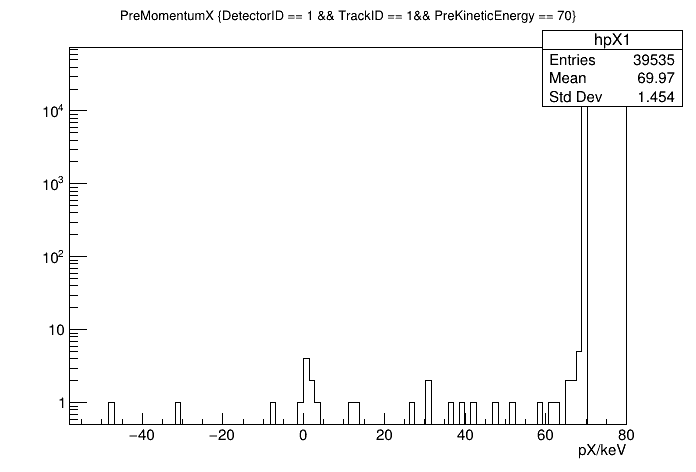

In [16]:
c7 = ROOT.TCanvas()
c7.SetLogy()
file.Hits.Draw("PreMomentumX>>hpX1","DetectorID == 1 && TrackID == 1"\
               "&& PreKineticEnergy == 70", "")
hpX1 = ROOT.gDirectory.Get("hpX1")
hpX1.GetXaxis().SetTitle('pX/keV')
c7.Draw()

Is the dispersion due to particles that need more time to arrive?

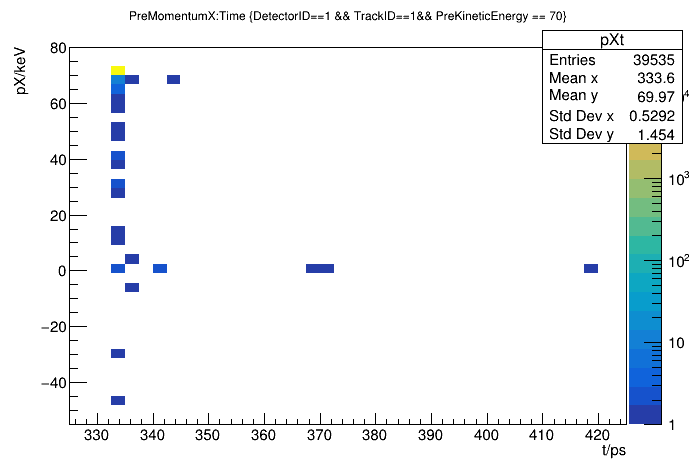

In [17]:
c7a = ROOT.TCanvas()
c7a.SetLogz()
file.Hits.Draw("PreMomentumX:Time>>pXt","DetectorID==1 && TrackID==1"\
               "&& PreKineticEnergy == 70", "Colz")
pXt = ROOT.gDirectory.Get("pXt")
pXt.GetXaxis().SetTitle('t/ps')
pXt.GetYaxis().SetTitle('pX/keV')
c7a.Draw()

Some particles arrive at same time but with different momentum, maybe they correspond with a second interaction

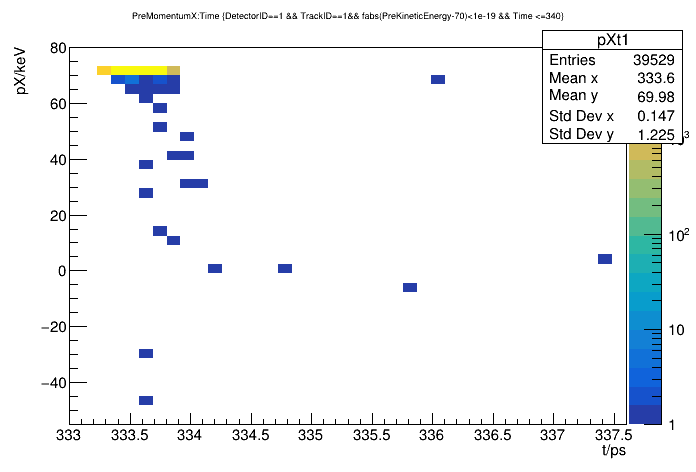

In [18]:
c7b = ROOT.TCanvas()
c7b.SetLogz()
file.Hits.Draw("PreMomentumX:Time>>pXt1","DetectorID==1 && TrackID==1"\
               "&& fabs(PreKineticEnergy-70)<1e-19 && Time <=340", "colz")
pXt1 = ROOT.gDirectory.Get("pXt1")
pXt1.GetXaxis().SetTitle('t/ps')
pXt1.GetYaxis().SetTitle('pX/keV')
c7b.Draw()

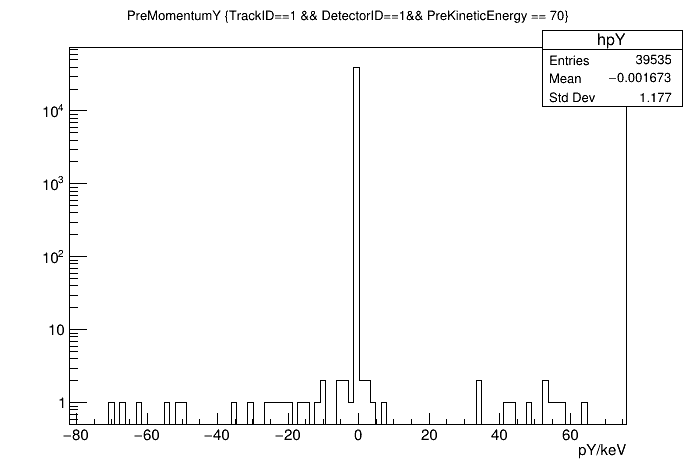

In [19]:
c8 = ROOT.TCanvas()
c8.SetLogy()
file.Hits.Draw("PreMomentumY>>hpY()", "TrackID==1 && DetectorID==1"\
               "&& PreKineticEnergy == 70","")
hpY = ROOT.gDirectory.Get("hpY")
hpY.GetXaxis().SetTitle('pY/keV')
c8.Draw()


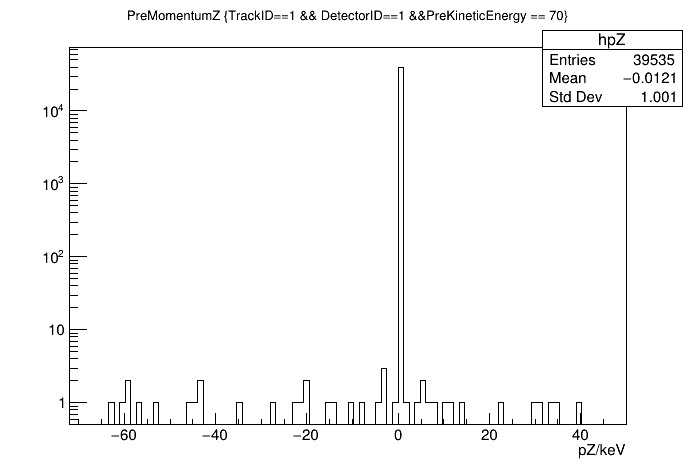

In [20]:
c9 = ROOT.TCanvas()
c9.SetLogy()
file.Hits.Draw("PreMomentumZ>>hpZ()", "TrackID==1 && DetectorID==1 &&"\
               "PreKineticEnergy == 70","")
hpZ = ROOT.gDirectory.Get("hpZ")
hpZ.GetXaxis().SetTitle('pZ/keV')
c9.Draw()

To check if this dispersion is due to interaction with the air use the simulation with the galactic medium

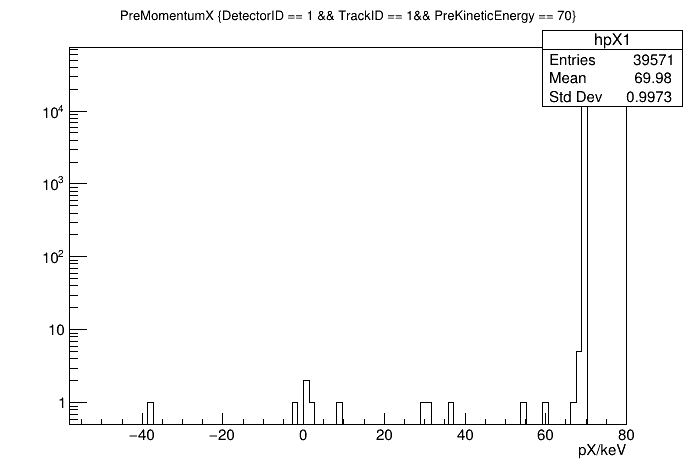

In [21]:
c7c = ROOT.TCanvas()
c7c.SetLogy()
galactic.Hits.Draw("PreMomentumX>>hpX1","DetectorID == 1 && TrackID == 1 &&"\
                   "PreKineticEnergy == 70", "")
hpX1 = ROOT.gDirectory.Get("hpX1")
hpX1.GetXaxis().SetTitle('pX/keV')
c7c.Draw()

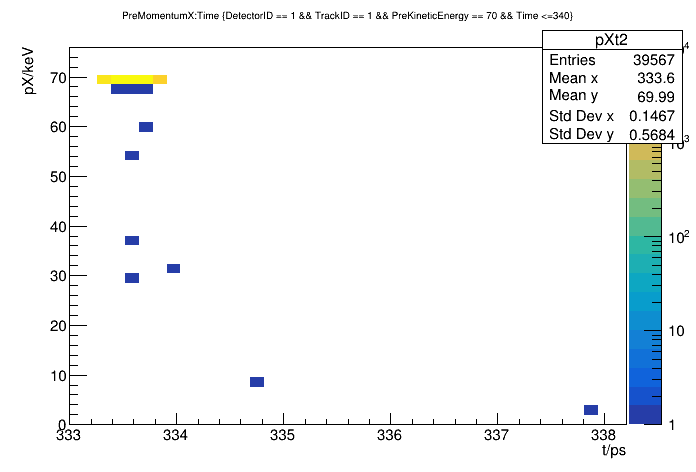

In [22]:
c7d = ROOT.TCanvas()
c7d.SetLogz()
galactic.Hits.Draw("PreMomentumX:Time>>pXt2","DetectorID == 1 && "\
    "TrackID == 1 && PreKineticEnergy == 70 && Time <=340", "Colz")
pXt2 = ROOT.gDirectory.Get("pXt2")
pXt2.GetXaxis().SetTitle('t/ps')
pXt2.GetYaxis().SetTitle('pX/keV')
c7d.Draw()

Some dispersion is observed, however the dispersion with the galactic medium is smaller than the one with air. Then, it might explain part of this dispersion.

### Energy distribution
Check the energy distribution of the photon after interacting with photoelectric effect and compton scattering

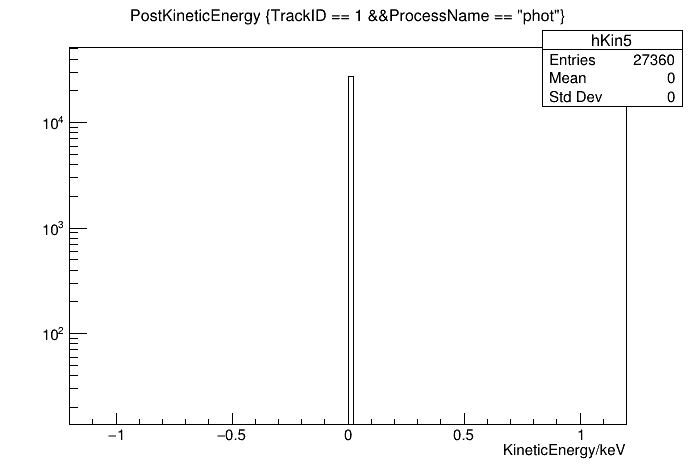

In [23]:
c11 = ROOT.TCanvas()
c11.SetLogy()
file.Hits.Draw("PostKineticEnergy>>hKin5",'TrackID == 1 &&'\
               'ProcessName == "phot"',"")
hKin5 = ROOT.gDirectory.Get('hKin5')
hKin5.GetXaxis().SetTitle('KineticEnergy/keV')
c11.Draw()

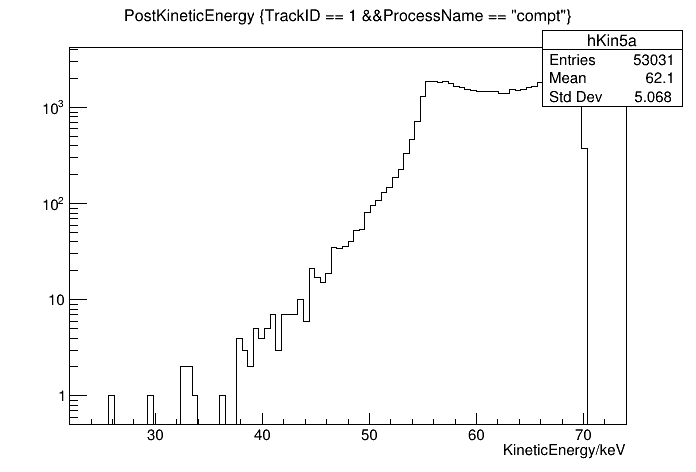

In [24]:
c11a = ROOT.TCanvas()
c11a.SetLogy()
file.Hits.Draw("PostKineticEnergy>>hKin5a",'TrackID == 1 &&'\
               'ProcessName == "compt"',"")
hKin5a = ROOT.gDirectory.Get('hKin5a')
hKin5a.GetXaxis().SetTitle('KineticEnergy/keV')
c11a.Draw()

### Scaterring angle

Compton angle calculated with the pre and post momentum angle

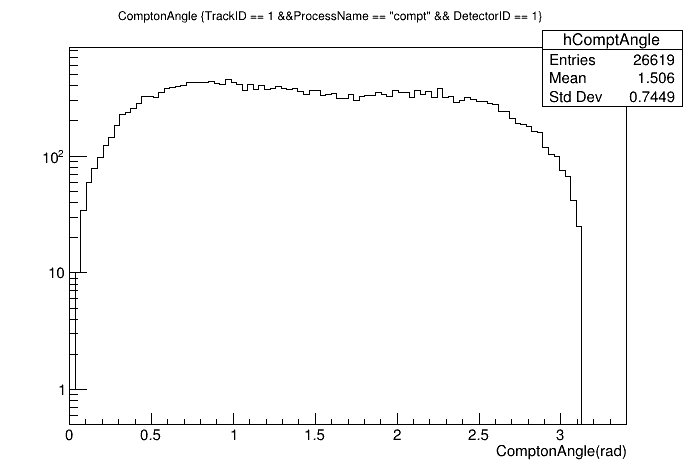

In [25]:
c12 = ROOT.TCanvas()
c12.SetLogy()
file.Hits.Draw("ComptonAngle>>hComptAngle",'TrackID == 1 &&'\
               'ProcessName == "compt" && DetectorID == 1',"")
hComptAngle = ROOT.gDirectory.Get('hComptAngle')
hComptAngle.GetXaxis().SetTitle('ComptonAngle(rad)')
c12.Draw()

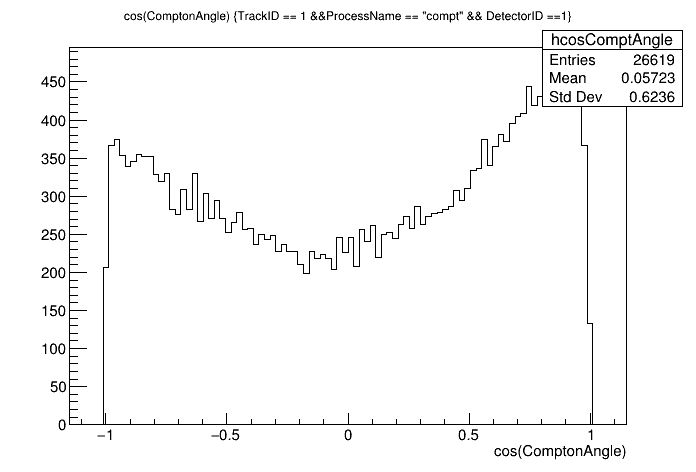

In [26]:
c13 = ROOT.TCanvas()
file.Hits.Draw("cos(ComptonAngle)>>hcosComptAngle",'TrackID == 1 &&'\
               'ProcessName == "compt" && DetectorID ==1',"")
hcosComptAngle = ROOT.gDirectory.Get('hcosComptAngle')
hcosComptAngle.GetXaxis().SetTitle('cos(ComptonAngle)')
c13.Draw()

Calculatig $\cos\theta$ with compton formula 

$$
\cos\theta = 1-m_0 c^2(\frac{1}{E_f} - \frac{1}{E_i})$$

Where $m_0 c^2 = 511$ keV is the electron mass

In [27]:
c14 = ROOT.TCanvas()
c14.SetLogy()

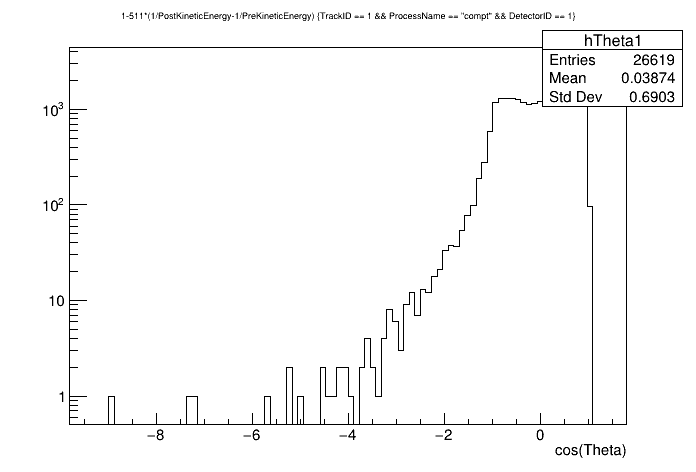

In [28]:
file.Hits.Draw("1-511*(1/PostKineticEnergy-1/PreKineticEnergy)>>hTheta1",'TrackID == 1 && ProcessName == "compt" && DetectorID == 1',"")
hTheta1 = ROOT.gDirectory.Get('hTheta1')
hTheta1.GetXaxis().SetTitle('cos(Theta)')
c14.Draw()

$\cos\theta<-1$ There is something wrong. Probably the mass assumption.

Then use the ComptonAngle (known) and the kinetic energies to calculate mass distribution

$$
m = \frac{1-\cos\theta}{\frac{1}{E_f}-\frac{1}{E_i}}
$$

In [29]:
line = ROOT.TLine(511,0,511,2e4)
line.SetLineColor(2)
line.SetLineWidth(2)
c15 = ROOT.TCanvas()
c15.SetLogy()

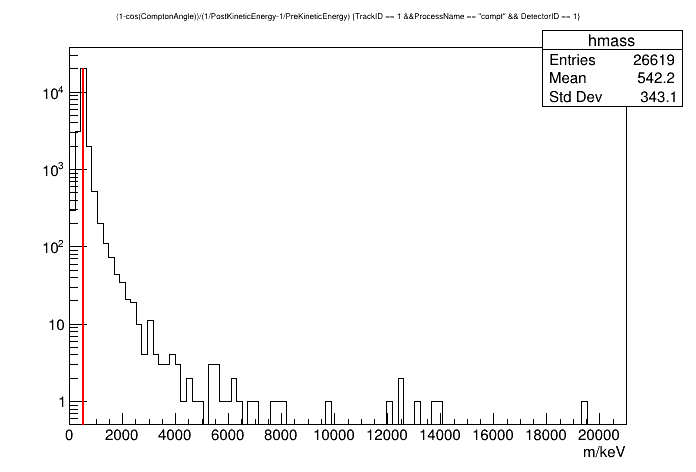

In [30]:
file.Hits.Draw("(1-cos(ComptonAngle))/(1/PostKineticEnergy-"\
               "1/PreKineticEnergy)>>hmass",'TrackID == 1 &&'\
               'ProcessName == "compt" && DetectorID == 1',"")
hmass = ROOT.gDirectory.Get('hmass')
hmass.GetXaxis().SetTitle('m/keV')
line.Draw()
c15.Draw()

### Time

In [35]:
c10a = ROOT.TCanvas()
c10a.SetLogy()
file.Hits.Draw("Time>>hT3", 'ParticleID == 22 && DetectorID == 1'\
               '&& ProcessName == "compt"',"")
file.Hits.Draw("Time>>hT4", 'ParticleID == 22 && DetectorID == 2'\
               '&& ProcessName == "compt"',"same")
hT3 = ROOT.gDirectory.Get("hT3")
hT4 = ROOT.gDirectory.Get("hT4")
hT3.GetXaxis().SetTitle('t/ps')
hT3.SetLineColor(2)
hT3.Draw()
hT4.SetLineColor(4)
hT4.Draw("same")

legend = ROOT.TLegend(0.7,0.6,0.9,0.7)
legend.AddEntry(hT3,"Detector 1","l")
legend.AddEntry(hT4,"Detector 2","l")
legend.Draw()

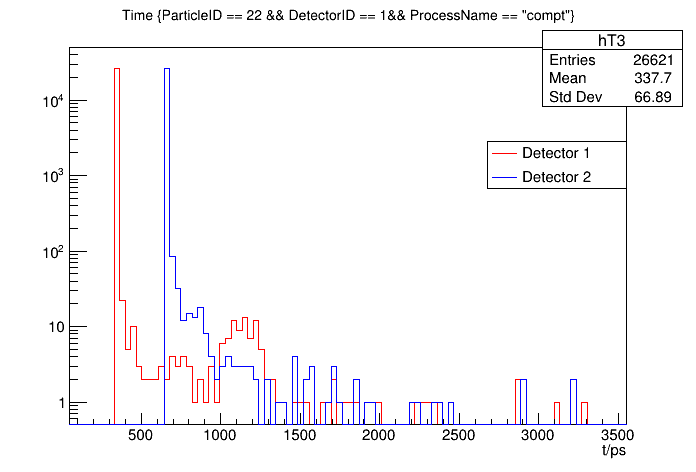

In [36]:
c10a.Draw()

Try to understand the peak at t = 1250 ps for the first detector. Always pX < 0, then it might be caused by secondary particles generated after interacting with the second detector 

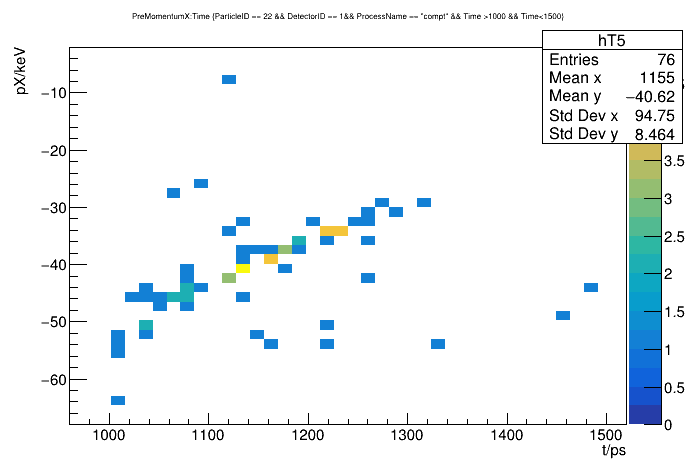

In [39]:
c12= ROOT.TCanvas()
file.Hits.Draw("PreMomentumX:Time>>hT5", 'ParticleID == 22 && DetectorID == 1'\
               '&& ProcessName == "compt" && Time >1000 && Time<1500',"colz")

hT5 = ROOT.gDirectory.Get("hT5")
hT5.GetXaxis().SetTitle('t/ps')
hT5.GetYaxis().SetTitle('pX/keV')

c12.Draw()


Explore the "normal" part of the detector 1 to get the time of arrival. 

$$
t_1 = detector_{distance}[1] * c
$$

Also a dispersion is expected due to the thickness of the detector and because the different interactions happens at differents depths of the detector

In [41]:
c10b = ROOT.TCanvas()
c10b.SetLogy()
file.Hits.Draw("Time>>hT1(100,333,335)", 'ParticleID == 22 && DetectorID == 1'\
               '&& ProcessName == "compt" && PreKineticEnergy ==70',"")
hT1 = ROOT.gDirectory.Get("hT1")
hT1.GetXaxis().SetTitle('t/ps')

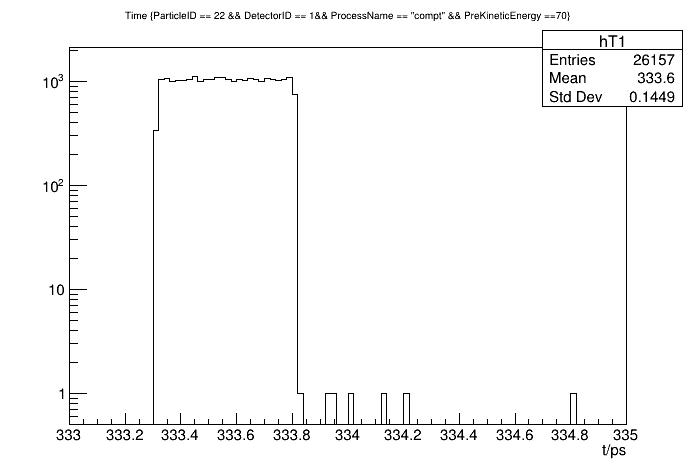

In [42]:
c10b.Draw()

$ t_1 \approx 333.5$ ps 

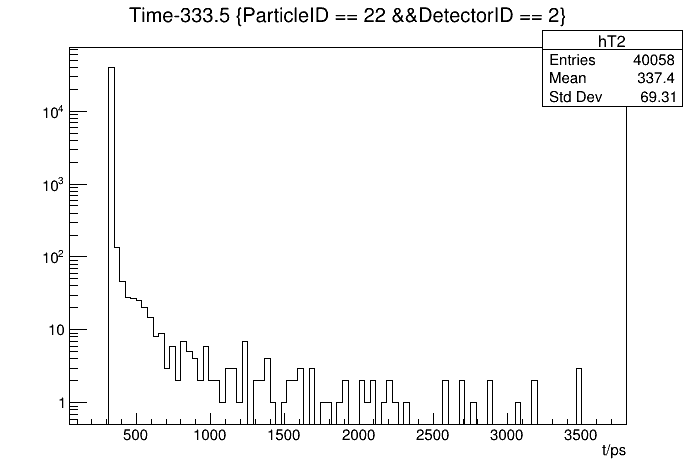

In [43]:
c10c = ROOT.TCanvas()
c10c.SetLogy()
file.Hits.Draw("Time-333.5>>hT2", 'ParticleID == 22 &&'\
               'DetectorID == 2',"")
hT2 = ROOT.gDirectory.Get("hT2")
hT2.GetXaxis().SetTitle('t/ps')
c10c.Draw()

Knowing the velocity ($c$) it is possible to relate the time with the distance traveled.

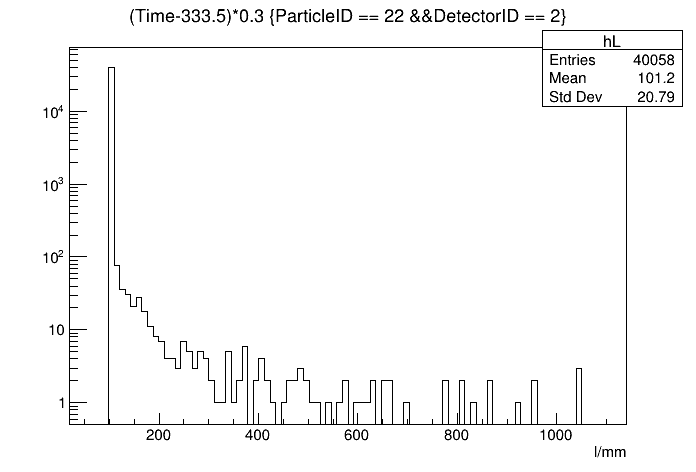

In [44]:
c10d = ROOT.TCanvas()
c10d.SetLogy()
file.Hits.Draw("(Time-333.5)*0.3>>hL", 'ParticleID == 22 &&'\
               'DetectorID == 2',"")
hL = ROOT.gDirectory.Get("hL")
hL.GetXaxis().SetTitle('l/mm')
c10d.Draw()

Now it is possible to calculate the scattered angle knowing that both detectors are separated 100 mm
$$
\cos\theta = \frac{100mm}{\Delta l}
$$

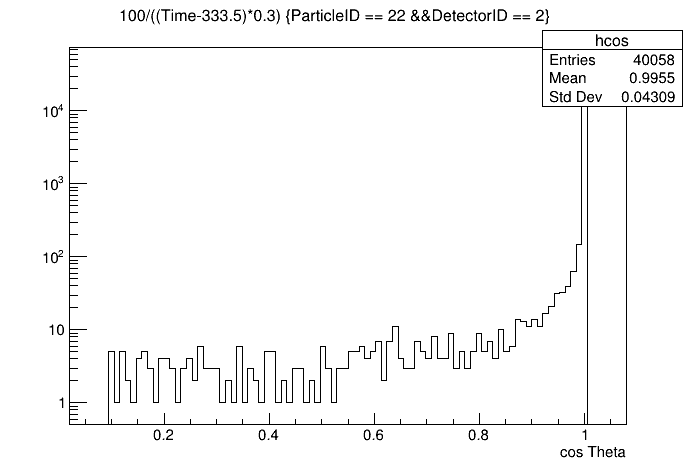

In [45]:
c10e = ROOT.TCanvas()
c10e.SetLogy()
file.Hits.Draw("100/((Time-333.5)*0.3)>>hcos", 'ParticleID == 22 &&'\
               'DetectorID == 2',"")
hcos = ROOT.gDirectory.Get("hcos")
hcos.GetXaxis().SetTitle('cos Theta')
c10e.Draw()

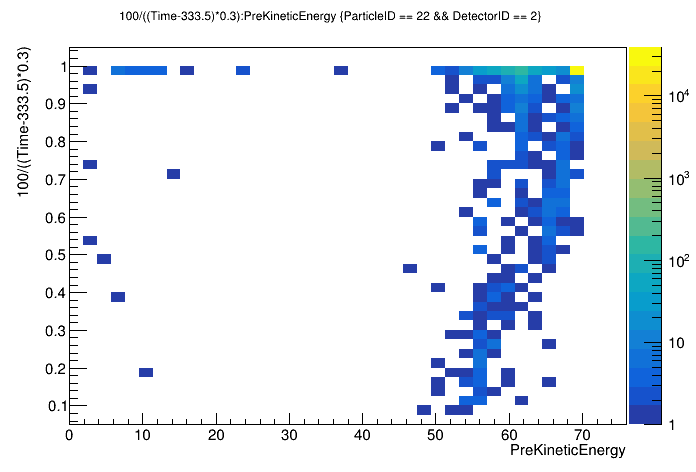

In [46]:
c10f = ROOT.TCanvas()
c10f.SetLogz()
file.Hits.Draw("100/((Time-333.5)*0.3):PreKineticEnergy", 'ParticleID == 22 && DetectorID == 2',"colz")
c10f.Draw()

Not obtained same results than in the compton angle part.

Only possitive values of $\cos\theta$ because it is calculated using the smallest angle without taking into account the sign. 
Not taking into account only compton scattered photons in first detector. It is plotted all photons that arrived at the second detector

With the geometry is possible to calculate maximum $\tan\theta_{max} =\frac{\sqrt{2*(detector_{size}/2)^2}}{detector_{distance}}= \frac{\sqrt{2*(300/2)^2}}{100}=2.12\rightarrow \theta_{max} = 1.13$ rad $\rightarrow \cos\theta_{max} = 0.426$ 

Why do we have $\cos\theta<0.426$?


Maybe we need to add a weight to correct if the scattering is purely on xy (or xz) plane (maximum angle smaller) or in a general plane with bigger maximum angle
$\tan\theta_{max-XY}\frac{detector_{size}/2}{detector_{distance}}=\frac{150}{100}=1.5\rightarrow \theta_{max-XY} = 0.9828 rad \rightarrow \cos\theta_{max-XY} =0.5547$

### Try to do a loop to check the flight of time of each particle

Select interesting events

In [48]:
print_bool = False
# Create a new TFile for storing Compton events
compton_events = ROOT.TFile("compton_events.root", "RECREATE")

pre_event = -1
pre_detector = -1
pre_particle = -1
pre_time = -1

# Create a new TTree for storing Compton events
compton_tree = ROOT.TTree("Hits", "Hits")
event = ROOT.vector('int')()
Detector1Time = ROOT.vector('double')()
Detector2Time = ROOT.vector('double')()

# Define branches in the new TTree
compton_tree.Branch("Event", event)
compton_tree.Branch("Detector1Time", Detector1Time)
compton_tree.Branch("Detector2Time", Detector2Time)


for line in file.Hits:
    if line.ParticleID == 22:    
        if line.Event == pre_event:
            # Time selection to avoid hits in detector2 first
            if line.DetectorID != pre_detector and pre_time <= 600:
                if print_bool:
                    print("Photon detected in both detectors")
                    print("Event: ", line.Event)
                    print("Time in detector 1: ", pre_time)
                    print("Time in detector 2: ", line.Time)
                
                # Fill the Compton event information to the new TTree
                event.push_back(line.Event)
                Detector1Time.push_back(pre_time)
                Detector2Time.push_back(line.Time)
        
        pre_event = line.Event
        pre_detector = line.DetectorID
        pre_particle = line.ParticleID
        pre_time = line.Time

compton_tree.Fill()
compton_tree.Write()
compton_events.Write()
compton_events.Close()

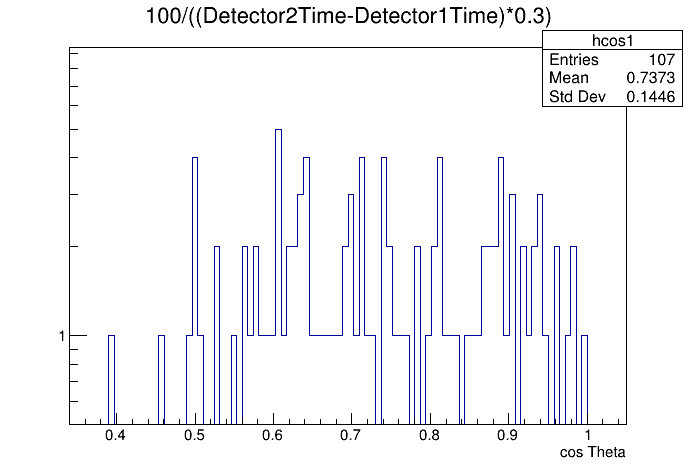

In [49]:
compton_events = ROOT.TFile("compton_events.root")
compton_tree = compton_events.Get("ComptonEvents")


c11 = ROOT.TCanvas()
c11.SetLogy()
#compton_events.Hits.Draw("Detector1Time", "", "")
compton_events.Hits.Draw("100/((Detector2Time-Detector1Time)*0.3)>>hcos1","", "")
hcos1 = ROOT.gDirectory.Get("hcos1")
hcos1.GetXaxis().SetTitle('cos Theta')
c11.Draw()

### Delta currents

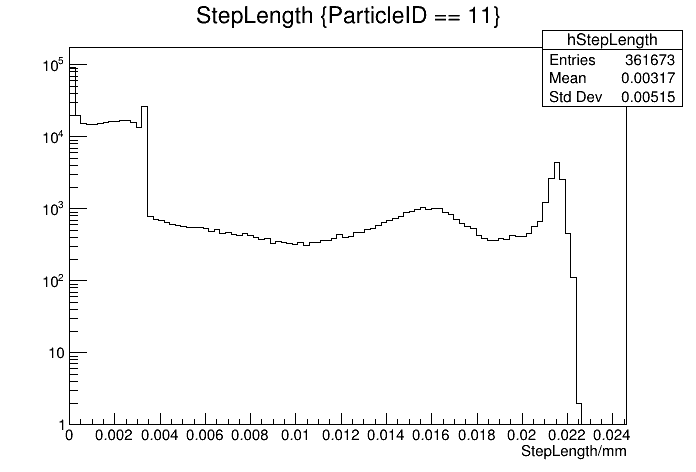

In [50]:
c16 = ROOT.TCanvas()
c16.SetLogy()
file.Hits.Draw("StepLength>>hStepLength", "ParticleID == 11","")
hStepLength = ROOT.gDirectory.Get("hStepLength")
hStepLength.GetXaxis().SetTitle('StepLength/mm')
c16.Draw()


In [51]:
c16a = ROOT.TCanvas()
c16a.Divide(2,1)
c16a.cd(1)
c16a.cd(1).SetLogy()
file.Hits.Draw("StepLength>>hStepLength1", 'DetectorID == 1 &&'\
               'ParticleID == 11',"")
hStepLength1 = ROOT.gDirectory.Get("hStepLength1")
hStepLength1.GetXaxis().SetTitle('StepLength/mm')
hStepLength1.GetXaxis().SetNdivisions(505)

c16a.cd(2)
c16a.cd(2).SetLogy()
file.Hits.Draw("StepLength>>hStepLength2", 'DetectorID == 2'\
               '&& ParticleID == 11',"")
hStepLength2 = ROOT.gDirectory.Get("hStepLength2")
hStepLength2.GetXaxis().SetTitle('StepLength/mm')
hStepLength2.GetXaxis().SetNdivisions(505)


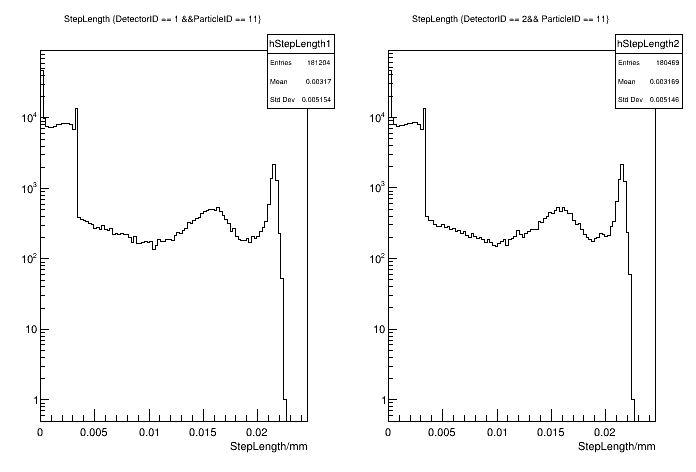

In [52]:
c16a.Draw()

Maximum Step Length is 0.025mm and detector thickness is 150um=0.15mm


Why are those peak observed?

Maybe until 0.005mm corresponds with compton effect and the other two peaks with some photoelectric effect with different shells.
Or 0.015mm peak correspondsd with electrons that arrive to the limit of the detector and can travel outside so increase it steplength

In event 0 there is a electron in detector 2

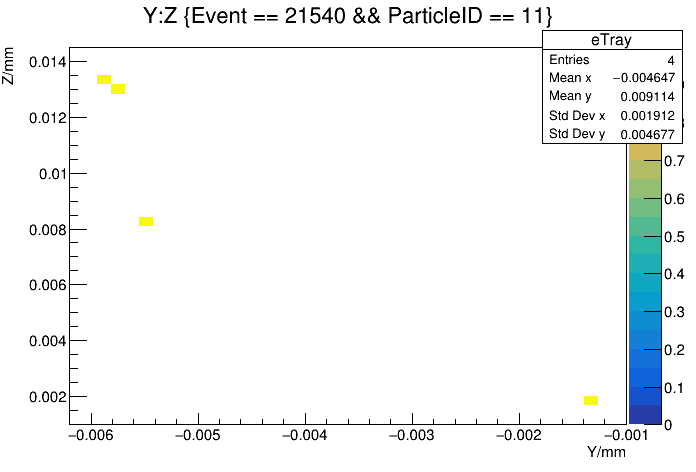

In [54]:
c16b = ROOT.TCanvas()

file.Hits.Draw("Y:Z>>eTray", "Event == 21540 && ParticleID == 11", "colz")
eTray = ROOT.gDirectory.Get("eTray")
eTray.GetXaxis().SetTitle('Y/mm')
eTray.GetYaxis().SetTitle('Z/mm')
# Set axis ranges in -150 to 150
#eTray.GetXaxis().SetLimits(-150,150)
#eTray.GetYaxis().SetLimits(-150,150)
c16b.Draw()